<a href="https://colab.research.google.com/github/TMikeM/PRUEBAS-PARA-EL-PROYECTO-FINAL/blob/main/grafoProyecto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
'''
---------------- NOMENCLATURA DE LOS EDIFICIOS: -------------------------|
- EN: Entrada de la 27         | - FINGF: Facultad de Fisicomecanicas
- CH: Ciencias Humanas         | - DI: Diseño industrial
- IM: Ingenieria Mecanica      | - CEIM:              
- CT: Camilo Torres            | - CAYFAV: CapriuisyFavuis
- CEN: Centic                  | - LABAT: Laboratorio de alta tension
- FDC : Facultad de Ciencias   | - LABDI: Laboratorio de diseli undustrial
- IE: Ingenieria Electrica     | - LABHI: Laboratorio de Hidraulica
- II: Ingenieria Industrial    | - PDA: Planta de Aceros
- IL: Instituto de Lenguas     | - JBV: Jorge Bautista V
- IQ: Ingenieria Quimica       | - DACA: Daniel Casas
- AMM: Aula Maxima de Mecanica | - AMF: Aula Maxima de Fisica
-E3T: Electrica Electronica y Telecomunicaciones 

'''

In [ ]:
''' El programa podría presentar tres servicios: (NO OFICIAL OJO)
>>> Consulta de una ruta en específico (Con el código de input que tiene Michael por ahí)
>>> Consulta de rutas según el horario (El funcionamiento principal de nuestro programa, por días, hasta donde tengo entendido xd)
>>> Consulta de rutas según el horario (Un funcionamiento extra, rutas individuales en un día en específico del horario)
Igual las dos últimas opciones son muy parecidas jsjsjsj
'''

In [2]:
import networkx as nx
import networkx.algorithms.isomorphism as iso
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
#Esto nos ayuda a cargar el archivo de excel para convertir a csv
from google.colab import files
files.upload()

In [4]:
#Convirtiendo el archivo excel a data Frame
df = pd.read_excel("grafo.xlsx", index_col=None)

In [5]:
df.head()

,Origen,Destino,Peso
0,EN,I0,180
1,IL,I0,85
2,IL,I1,121
3,AMM,I1,17
4,IM,I1,25


In [70]:
#Esto es para...
G = nx.from_pandas_edgelist(df,source='Origen',target='Destino',edge_attr='Peso')

In [7]:
##########    Como entiende la librería los datos de nuestro grafo     #######
#Nodos del Grafo
print(f"Los nodos del grafo son: \n{G.nodes()}")

#Aristas del Grafo 
print(f"Las aristas del grafo son:\n{G.edges()}")

#Grado del Grafo 
print(f"El grado del grafo es: \n{G.order()}")

Los nodos del grafo son: 
['EN', 'I0', 'IL', 'I1', 'AMM', 'IM', 'CT', 'I2', 'CEN', 'I3', 'FDC', 'IQ', 'AMF', 'CAYFA', 'JBV', 'I4', 'PDA', 'FINGF', 'DACA', 'I5', 'CEIAM', 'I6', 'DI', 'I7', 'II', 'E3T', 'I8', 'LABAT', 'LABHI', 'TDI', 'I9', 'CH']
Las aristas del grafo son:
[('EN', 'I0'), ('EN', 'I9'), ('I0', 'IL'), ('I0', 'I1'), ('IL', 'I1'), ('IL', 'I6'), ('I1', 'AMM'), ('I1', 'IM'), ('I1', 'I2'), ('IM', 'I9'), ('CT', 'I2'), ('CT', 'I3'), ('I2', 'CEN'), ('I2', 'I6'), ('I2', 'I9'), ('I2', 'I3'), ('CEN', 'I3'), ('I3', 'FDC'), ('I3', 'IQ'), ('I3', 'AMF'), ('I3', 'CAYFA'), ('I3', 'I4'), ('AMF', 'I8'), ('CAYFA', 'I8'), ('JBV', 'I4'), ('I4', 'PDA'), ('I4', 'FINGF'), ('I4', 'I5'), ('DACA', 'I5'), ('I5', 'CEIAM'), ('I6', 'DI'), ('I6', 'I7'), ('DI', 'I7'), ('I7', 'II'), ('I7', 'E3T'), ('I7', 'I8'), ('E3T', 'I8'), ('I8', 'LABAT'), ('I8', 'LABHI'), ('I8', 'TDI'), ('I9', 'CH')]
El grado del grafo es: 
32


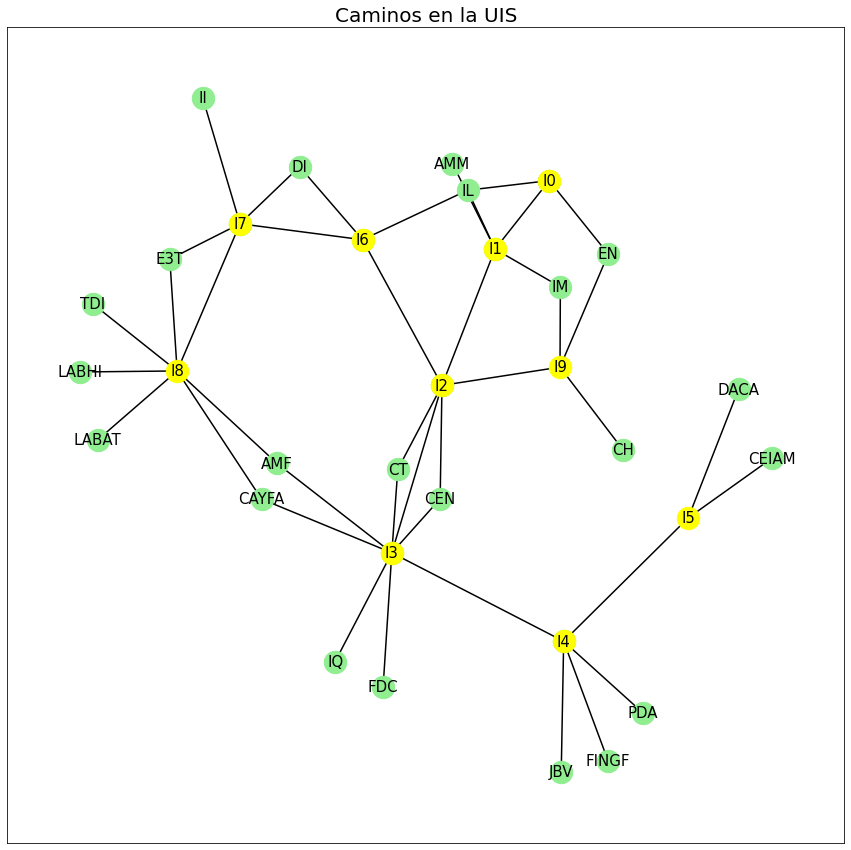

In [8]:
#Graficando el grafo general

#Tamaño de la gráfica
fig, ax = plt.subplots(figsize=(15, 15)) 

#Distancia de los nodos
seed = 2
pos = nx.spring_layout(G, seed=seed)

#Configuración para las aristas
nx.draw_networkx_edges(G, pos, edge_color='black', width = 1.5)

#Configuración para los nodos
inter = list(df.Destino.unique())
edif = list(df.Origen.unique())

nx.draw_networkx_nodes(G, pos, nodelist=edif, node_size=500, node_color='lightgreen') #Para los edificios
nx.draw_networkx_nodes(G, pos, nodelist=inter, node_size=500, node_color='yellow') #Para las intersecciones

#Configuración para las etiquetas de la gráfica
nx.draw_networkx_labels(G, pos, font_size=15)

plt.title("Caminos en la UIS", fontdict={'fontsize':20})
plt.axis('on')
plt.show()

In [9]:
#Se realiza una prueba utilizando el algoritmo de Dijsktra
djk_path= nx.dijkstra_path(G, source='EN', target='LABAT', weight='Peso')
djk_path

['EN', 'I9', 'I2', 'CT', 'I3', 'AMF', 'I8', 'LABAT']

In [10]:
#Se realiza una sefunda prueba utilizando el algoritmo de Dijsktra y pidiendole el inicio y fin de la ruta
print("Escribe las inicales de los edificos en ***Mayuscula***")
x= input("Ingresa las iniciales del edifico de Inicio: ")
y= input("Ingresa las iniciales del edifico de Destino: ")

djk_path= nx.dijkstra_path(G, source= x, target= y, weight='Peso')
djk_path

Escribe las inicales de los edificos en ***Mayuscula***
Ingresa las iniciales del edifico de Inicio: EN
Ingresa las iniciales del edifico de Destino: LABAT


['EN', 'I9', 'I2', 'CT', 'I3', 'AMF', 'I8', 'LABAT']

In [63]:
'''
EN ESTA EXTENSION NO TOMA AL NODO DEL CAMILO TORRES PARA PASAR POR EL CAMINO HACIA LABAT
EN CAMBIO, EN EL ALGORITMO DE ARRIBA TOMA EL CAMINO PASANDO POR EL CT , Y EN VERDA
ME PARECE MEJOR EL SEGUNDO PERO DEBEMOS REALIZAR LA PRUEBA EN LA QUE QUEDAMOS DE ACUERDO.
'''
djk_path= nx.dijkstra_path(G, source= x, target= y, weight='Peso') #ESTE ES EL ALGORITMO QUE TOMA EL CAMILO TORRES
print(f"Camino con nx.dijkstra_path: {djk_path}")
pathD = nx.shortest_path(G,source='EN',target='LABAT', weight='peso')#ESTE EL ALGORITMO QUE NO TOMA EL CAMILO TORRES ES DECIR DE UNA VEZ PASA A LA INTERSECCION SIGUIENTE.
print(f"Camino con nx.shortest_path sin method: {pathD}")
pathE = nx.shortest_path(G,source='EN',target='LABAT', weight='peso', method='dijkstra')#ESTE EL ALGORITMO QUE NO TOMA EL CAMILO TORRES ES DECIR DE UNA VEZ PASA A LA INTERSECCION SIGUIENTE.
print(f"Camino con nx.shortest_path con method: {pathE}")

Camino con nx.dijkstra_path: ['EN', 'I9', 'I2', 'CT', 'I3', 'AMF', 'I8', 'LABAT']
Camino con nx.shortest_path sin method: ['EN', 'I9', 'I2', 'I3', 'AMF', 'I8', 'LABAT']
Camino con nx.shortest_path con method: ['EN', 'I9', 'I2', 'I3', 'AMF', 'I8', 'LABAT']


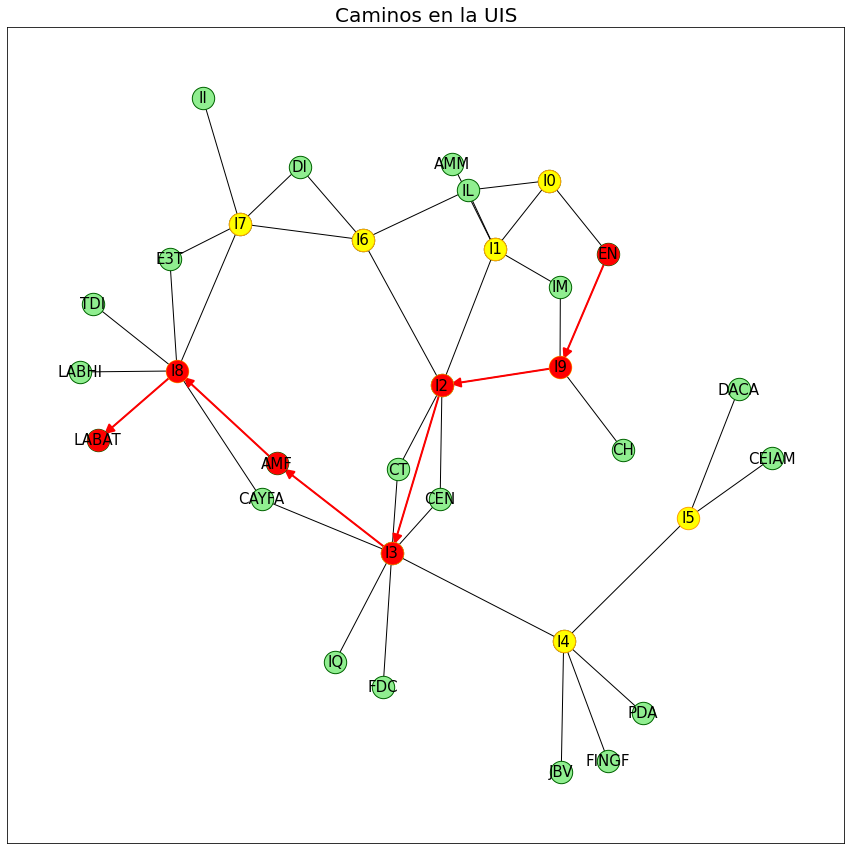

In [12]:
#Graficando el grafo con rutas

#Tamaño de la gráfica
fig, ax = plt.subplots(figsize=(15, 15)) 

#Distancia de los nodos
seed = 2
pos = nx.spring_layout(G, seed=seed)

#Configuración para los nodos
inter = list(df.Destino.unique())
edif = list(df.Origen.unique())

nx.draw_networkx_nodes(G, pos, nodelist=edif, node_size=500, edgecolors = 'darkgreen', node_color='lightgreen') #Para los edificios
nx.draw_networkx_nodes(G, pos, nodelist=inter, node_size=500, edgecolors = 'orange', node_color='yellow') #Para las intersecciones

#Configuración para las aristas
nx.draw_networkx_edges(G, pos, edge_color='black', width = 1)

#Configuración para colorear el camino más corto (LO QUE ESTÁ EN ROJO)
path = nx.shortest_path(G,source='EN',target='LABAT', weight='peso', method='dijkstra')
path_edges = list(zip(path,path[1:]))
nx.draw_networkx_nodes(G,pos,nodelist=path, node_size=450, node_color='red')
nx.draw_networkx_edges(G, pos, arrows = True, arrowstyle="-|>", arrowsize=20, edgelist=path_edges,  edge_color='red', width=2)

#Configuración para las etiquetas de la gráfica
nx.draw_networkx_labels(G, pos, font_size=15)

plt.title("Caminos en la UIS", fontdict={'fontsize':20})
plt.axis('on')
plt.savefig('Mapa_UIS.eps', dpi = 300, format = 'eps', transparent = True)
plt.show()

In [71]:
#Listas de caminos a probar hehe
#NOTAS:
#Falta FIFM según el mapa, no sé que nombre le colocaron pero no lo encontré
#djk_path= nx.dijkstra_path(G, source= 'EN', target= 'LABAT', weight='Peso')
#djk_path_edges = list(zip(djk_path,djk_path[1:])) (En caso de que este algoritmo sea el correcto jeje)

#Configuración para colorear el camino más corto
path = nx.shortest_path(G,source='EN',target='LABAT', weight='peso', method='dijkstra')
path_edges = list(zip(path,path[1:]))

path2 = nx.shortest_path(G,source='CT',target='E3T', weight='peso', method='dijkstra')
path_edges2 = list(zip(path2,path2[1:]))

path3 = nx.shortest_path(G,source='DACA',target='EN', weight='peso', method='dijkstra')
path_edges3 = list(zip(path3,path3[1:]))

path4 = nx.shortest_path(G,source='CT',target='CEN', weight='peso', method='dijkstra')
path_edges4 = list(zip(path4,path4[1:]))

path5 = nx.shortest_path(G,source='II',target='FDC', weight='peso', method='dijkstra')
path_edges5 = list(zip(path5,path5[1:]))

path6 = nx.shortest_path(G,source='LABAT',target='EN', weight='peso', method='dijkstra')
path_edges6 = list(zip(path6,path6[1:]))

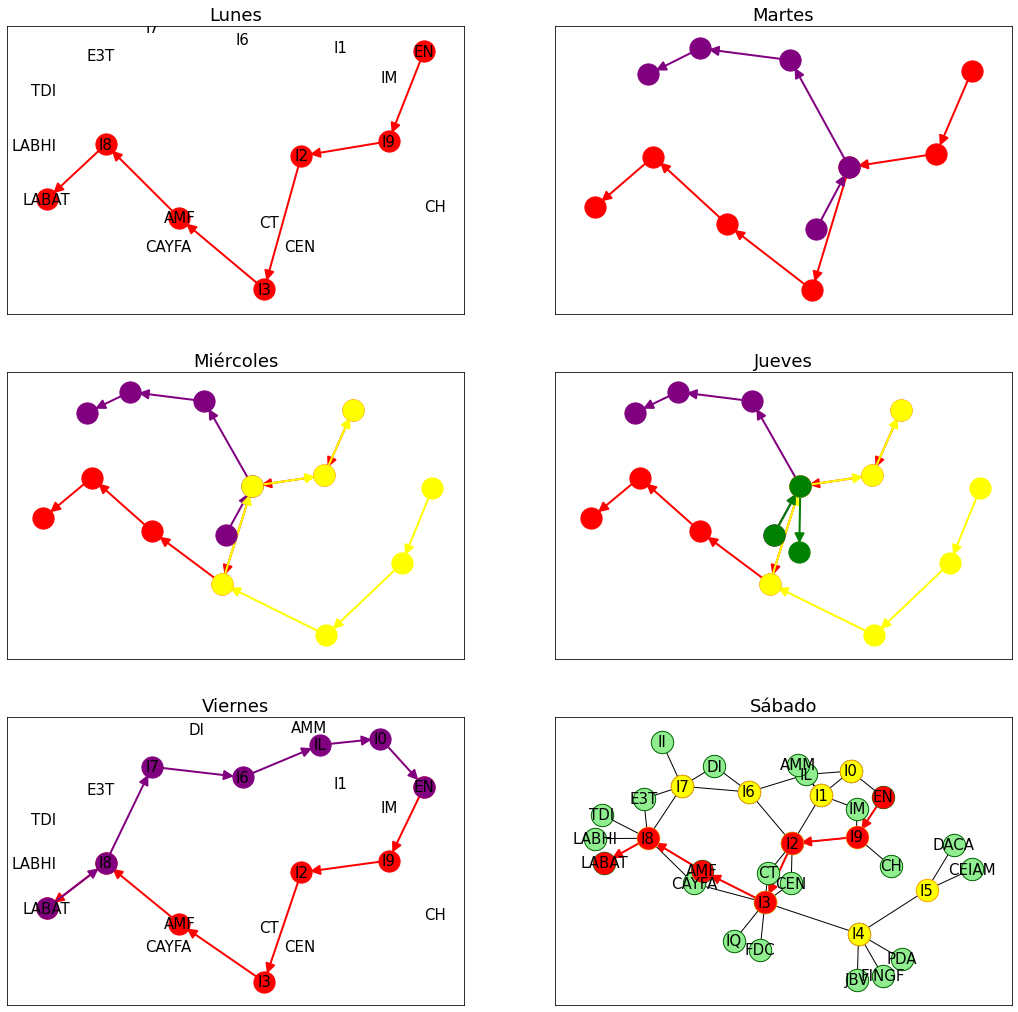

In [72]:
#Graficando el grafo por sub plots
#Tamaño de la gráfica
fig, ax = plt.subplots(figsize=(18, 18)) 

#Distancia de los nodos
seed = 2
pos = nx.spring_layout(G, seed=seed)

#plt.title("Caminos en la UIS", fontsize=15)

# Subplot LUNES
# plt.subplot(Filas, Columnas, posición)
plt.subplot(3, 2, 1)
#ruta en una gráfica, ruta única
#PROBLEMA: No me deja ponerle solo los nombres de los nodos de acá, si no, todo los nodos AJSDAKFAD
nx.draw_networkx_nodes(G,pos, nodelist=path, label = 'True', node_size=450, node_color='red')
nx.draw_networkx_edges(G, pos, arrows = True, arrowstyle="-|>", arrowsize=20, edgelist=path_edges,  edge_color='red', width=2)
nx.draw_networkx_labels(G, pos, font_size=15)
plt.title('Lunes', fontsize=18)

# Subplot MARTES
plt.subplot(3, 2, 2)
#Dos rutas en una gráfica, primera ruta
nx.draw_networkx_nodes(G,pos, label=True, nodelist=path, node_size=450, node_color='red')
nx.draw_networkx_edges(G, pos, arrows = True, arrowstyle="-|>", arrowsize=20, edgelist=path_edges,  edge_color='red', width=2)
#Dos rutas en una gráfica, segunda ruta
nx.draw_networkx_nodes(G,pos, nodelist=path2, label = 'True', node_size=450, node_color='purple')
nx.draw_networkx_edges(G, pos, arrows = True, arrowstyle="-|>", arrowsize=20, edgelist=path_edges2,  edge_color='purple', width=2)
plt.title('Martes', fontsize=18)

# Subplot MIÉRCOLES
plt.subplot(3, 2, 3)
#Tres rutas en una gráfica, primera ruta
nx.draw_networkx_nodes(G,pos, nodelist=path, label = 'True', node_size=450, node_color='red')
nx.draw_networkx_edges(G, pos, arrows = True, arrowstyle="-|>", arrowsize=20, edgelist=path_edges,  edge_color='red', width=2)
#Tres rutas en una gráfica, segunda ruta
nx.draw_networkx_nodes(G,pos, nodelist=path2, label = 'True', node_size=450, node_color='purple')
nx.draw_networkx_edges(G, pos, arrows = True, arrowstyle="-|>", arrowsize=20, edgelist=path_edges2,  edge_color='purple', width=2)
#Tres rutas en una gráfica, tercera ruta
nx.draw_networkx_nodes(G,pos, nodelist=path3, label = 'True', node_size=450, node_color='yellow')
nx.draw_networkx_edges(G, pos, arrows = True, arrowstyle="-|>", arrowsize=20, edgelist=path_edges3,  edge_color='yellow', width=2)
plt.title('Miércoles', fontsize=18)

# Subplot JUEVES
plt.subplot(3, 2, 4)
#Cuatro rutas en una gráfica, primera ruta
nx.draw_networkx_nodes(G,pos, nodelist=path, label = 'True', node_size=450, node_color='red')
nx.draw_networkx_edges(G, pos, arrows = True, arrowstyle="-|>", arrowsize=20, edgelist=path_edges,  edge_color='red', width=2)
#Cuatro rutas en una gráfica, segunda ruta
nx.draw_networkx_nodes(G,pos, nodelist=path2, label = 'True', node_size=450, node_color='purple')
nx.draw_networkx_edges(G, pos, arrows = True, arrowstyle="-|>", arrowsize=20, edgelist=path_edges2,  edge_color='purple', width=2)
#Cuatro rutas en una gráfica, tercera ruta
nx.draw_networkx_nodes(G,pos, nodelist=path3, label = 'True', node_size=450, node_color='yellow')
nx.draw_networkx_edges(G, pos, arrows = True, arrowstyle="-|>", arrowsize=20, edgelist=path_edges3,  edge_color='yellow', width=2)
#Tres rutas en una gráfica, cuarta ruta
nx.draw_networkx_nodes(G,pos, nodelist=path4, label = 'True', node_size=450, node_color='green')
nx.draw_networkx_edges(G, pos, arrows = True, arrowstyle="-|>", arrowsize=20, edgelist=path_edges4,  edge_color='green', width=2)
plt.title('Jueves', fontsize=18)

# Subplot VIERNES
plt.subplot(3, 2, 5)
#OJO con esta ruta, es EN->LABAT, LABAT->EN 
#Y qué pasa si repite ruta en el día? Eso veremos...
nx.draw_networkx_nodes(G,pos, nodelist=path, label = 'True', node_size=450, node_color='red')
nx.draw_networkx_edges(G, pos, arrows = True, arrowstyle="-|>", arrowsize=20, edgelist=path_edges,  edge_color='red', width=2)
nx.draw_networkx_nodes(G,pos, nodelist=path6, label = 'True', node_size=450, node_color='purple')
nx.draw_networkx_edges(G, pos, arrows = True, arrowstyle="-|>", arrowsize=20, edgelist=path_edges6,  edge_color='purple', width=2)
nx.draw_networkx_labels(G, pos, font_size=15)
plt.title('Viernes', fontsize=18)

# Subplot SÁBADO (tristemente)
plt.subplot(3, 2, 6)
#Todo el mapa
nx.draw_networkx_nodes(G, pos, nodelist=edif, node_size=500, edgecolors = 'darkgreen', node_color='lightgreen') #Para los edificios
nx.draw_networkx_nodes(G, pos, nodelist=inter, node_size=500, edgecolors = 'orange', node_color='yellow') #Para las intersecciones
nx.draw_networkx_edges(G, pos, edge_color='black', width = 1)
nx.draw_networkx_nodes(G,pos, label=True, nodelist=path, node_size=450, node_color='red')
nx.draw_networkx_edges(G, pos, arrows = True, arrowstyle="-|>", arrowsize=20, edgelist=path_edges,  edge_color='red', width=2)
nx.draw_networkx_labels(G, pos, font_size=15)
plt.title('Sábado', fontsize=18)

plt.axis('on')
plt.savefig('Mapa_UIS.eps', dpi = 300, format = 'eps', transparent = True)
plt.show()

In [ ]:
#En esta impresion a pantalla mostramos la cantidad total de puntos por lo que el usuario recorre y la distancia total en metros.
print(f"Utd recorrera en total: {len(djk_path)} puntos.\n La distancia en metros es {nx.dijkstra_path_length(G, 'EN', 'LABAT', 'Peso')}")

Utd recorrera en total: 8 puntos.
 La distancia en metros es 435


In [ ]:
#Este archivo nos  ayuda a exportar el grafo graficado 
#mas arriba a un archivo modificable en ghepi y asi realizar mas "Bonito el grafo"
nx.write_gexf(G,'grafo.gexf',version='1.2draft')